binaryImageNames: ['./test_images/binary/test1.png', './test_images/binary/test2.png', './test_images/binary/test3.png', './test_images/binary/test4.png', './test_images/binary/test5.png', './test_images/binary/test6.png']
binaryImageName:  ./test_images/binary/test1.png , binaryImage.shape: (620, 1180) , type: uint8
binaryImageName:  ./test_images/binary/test2.png , binaryImage.shape: (620, 1180) , type: uint8
binaryImageName:  ./test_images/binary/test3.png , binaryImage.shape: (620, 1180) , type: uint8
binaryImageName:  ./test_images/binary/test4.png , binaryImage.shape: (620, 1180) , type: uint8
binaryImageName:  ./test_images/binary/test5.png , binaryImage.shape: (620, 1180) , type: uint8
binaryImageName:  ./test_images/binary/test6.png , binaryImage.shape: (620, 1180) , type: uint8


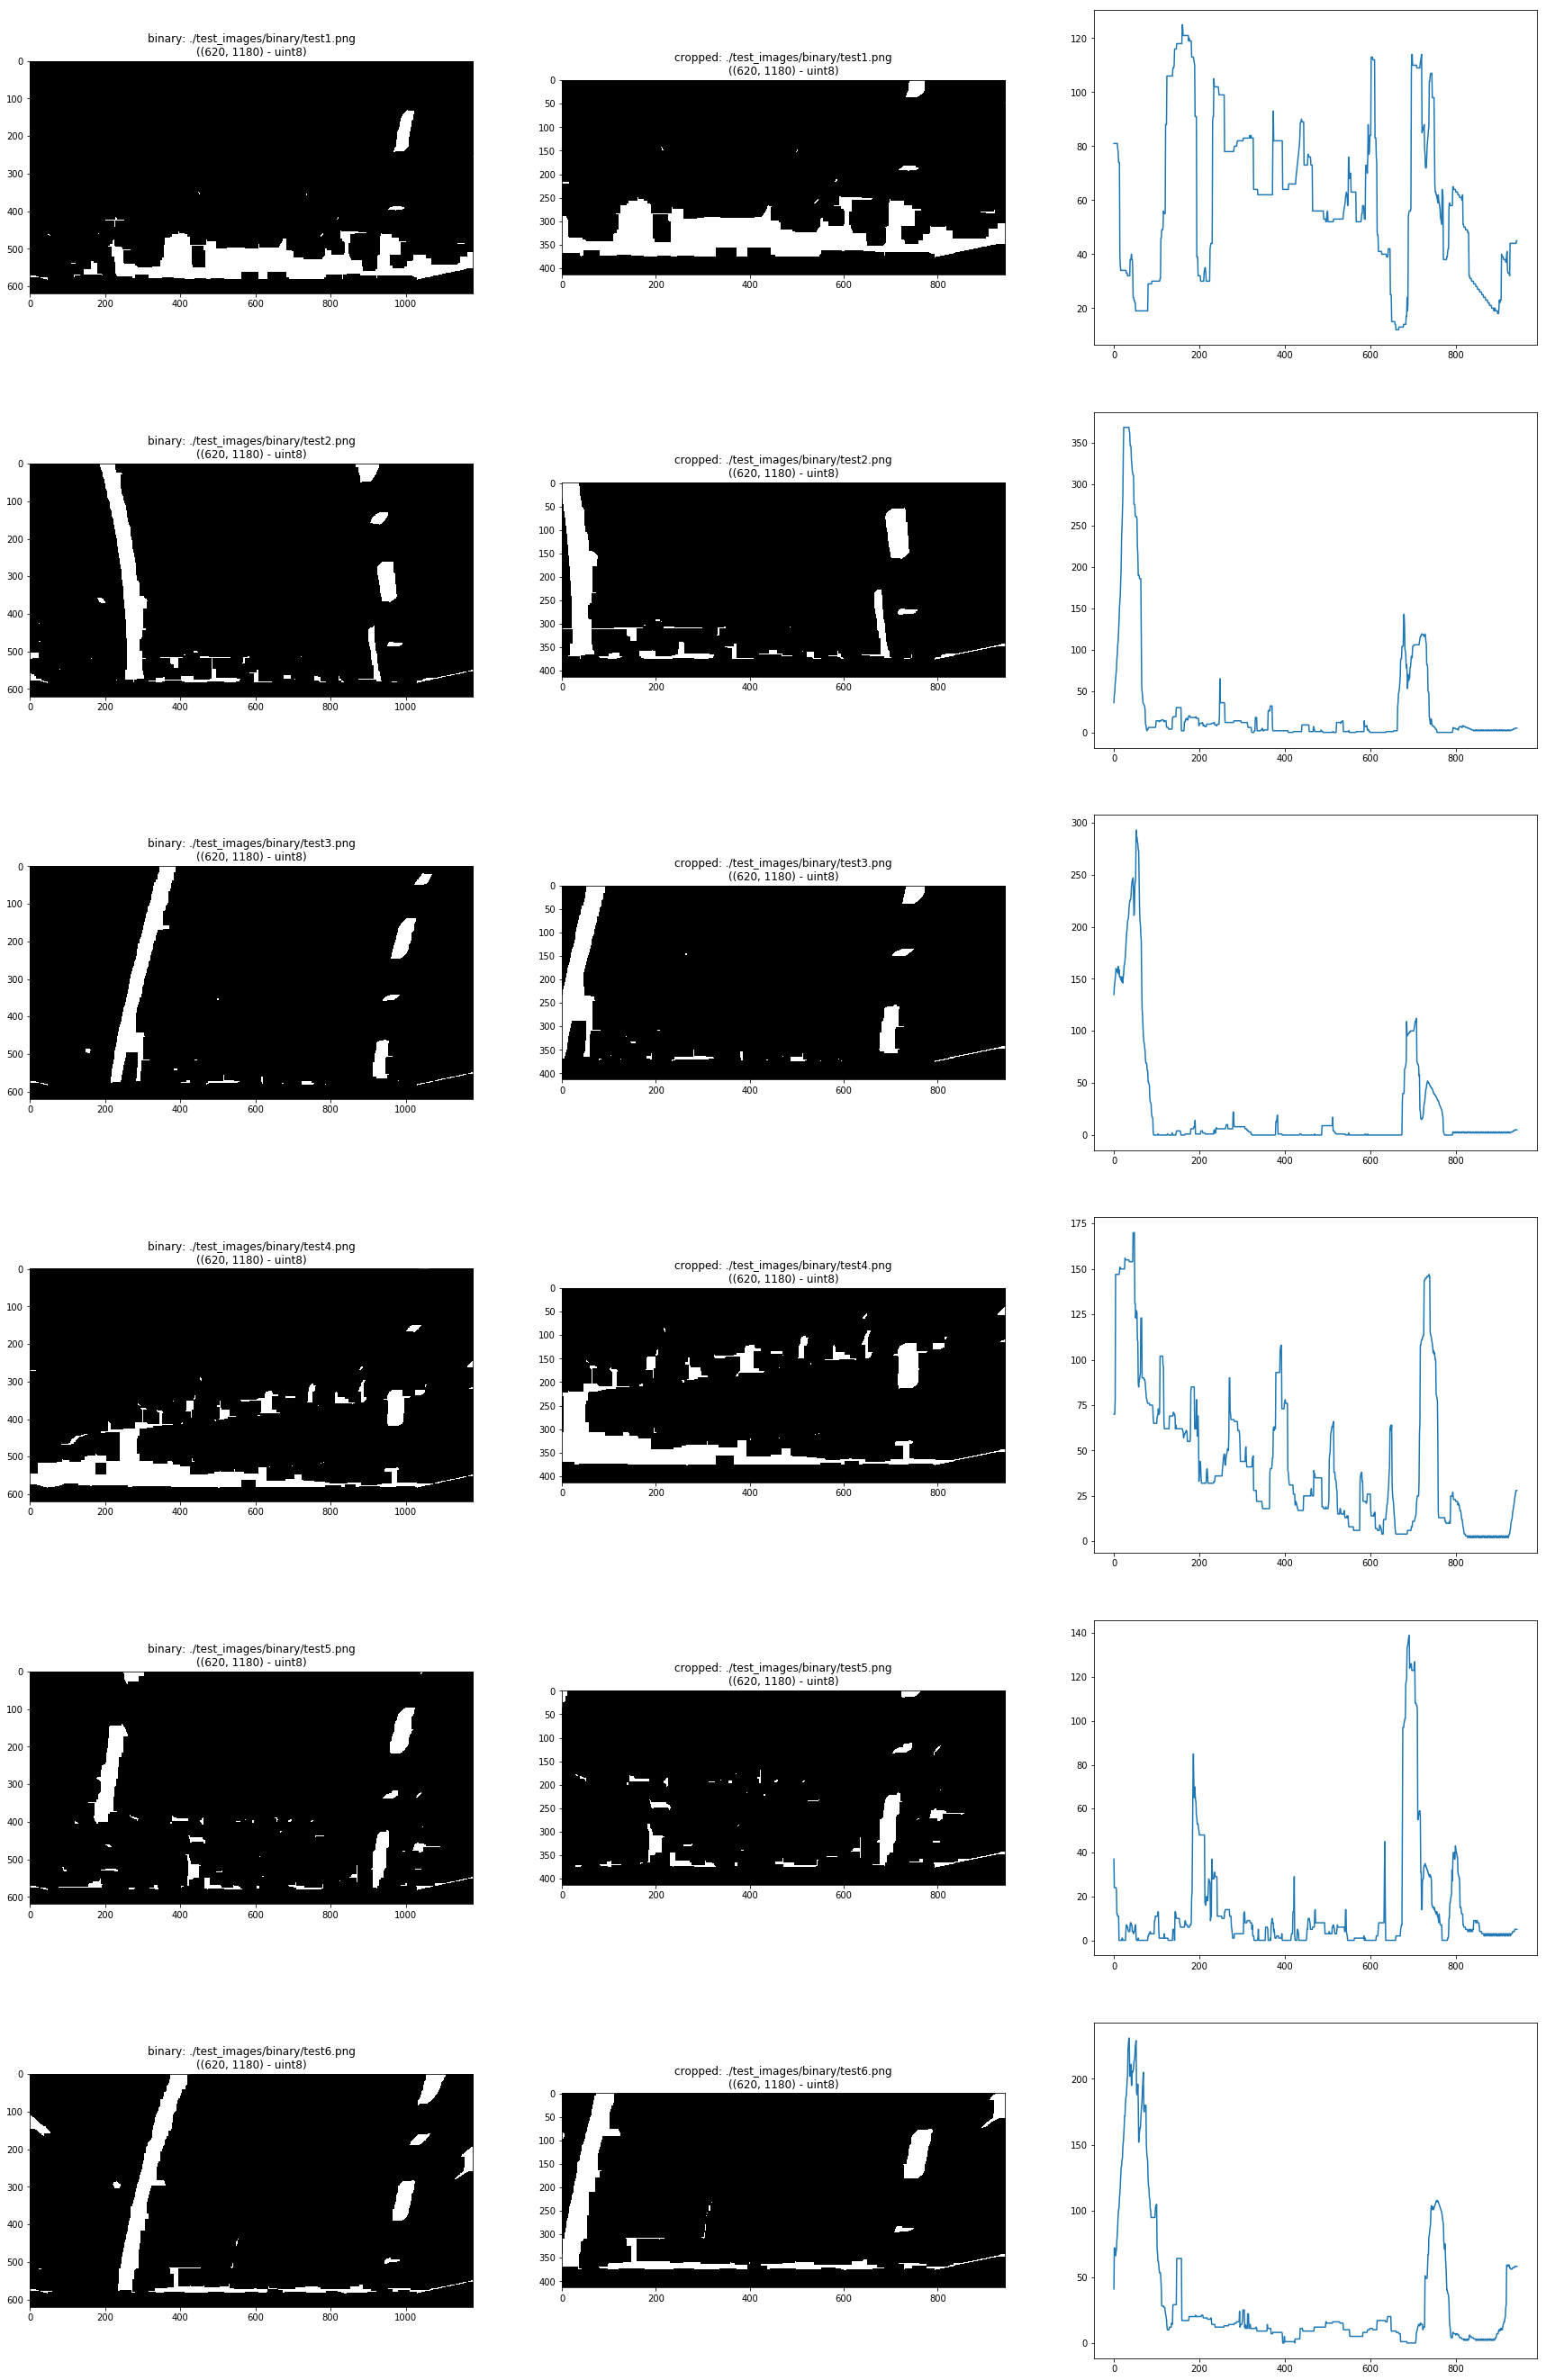

In [4]:
import glob
import numpy as np

binaryImageNames=glob.glob("./test_images/binary/test*")
binaryImageNames.sort()
print("binaryImageNames:", binaryImageNames)

binaryImageColumnCount=3 # original, transformed
totalImageRows=len(binaryImageNames) # 1 row per image

#import matplotlib.image as mpimage
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
showBinaryImages = plt.figure(figsize = (binaryImageColumnCount*10,totalImageRows*8))

binaryImages={}
histograms={}

for binaryImageName, binaryImageIndex in zip(binaryImageNames, range(0, binaryImageColumnCount*len(binaryImageNames), binaryImageColumnCount)):
    binaryImage=cv2.imread(binaryImageName, flags=0) # flags=0 is grayscale
    print("binaryImageName: ",binaryImageName, ", binaryImage.shape:", binaryImage.shape, ", type:", binaryImage.dtype)
    binaryImages[binaryImageName]=binaryImage

    p=showBinaryImages.add_subplot(totalImageRows, binaryImageColumnCount, binaryImageIndex+1)
    p.set_title("binary: "+binaryImageName+"\n("+str(binaryImage.shape)+" - "+str(binaryImage.dtype)+")")
    p.imshow(binaryImage, cmap='gray')

    startingInRow=binaryImage.shape[0]//3
    startingInColumn=binaryImage.shape[1]//5
    
    p=showBinaryImages.add_subplot(totalImageRows, binaryImageColumnCount, binaryImageIndex+2)
    croppedBinary=binaryImage[startingInRow:,startingInColumn:]
    p.set_title("cropped: "+binaryImageName+"\n("+str(binaryImage.shape)+" - "+str(binaryImage.dtype)+")")
    p.imshow(croppedBinary, cmap='gray')
    
    histogram = np.sum(binaryImage[startingInRow:,startingInColumn:], axis=0)
    histograms[binaryImageName]=histogram

    p=showBinaryImages.add_subplot(totalImageRows, binaryImageColumnCount, binaryImageIndex+3)
    #p.set_title("binary: "+binaryImageName+"\n("+str(binaryImage.shape[0])+"x"+str(binaryImage.shape[1])+")")
    p.plot(histogram)

In [ ]:
for binaryImageName, binaryImageIndex in zip(binaryImageNames, range(0, binaryImageColumnCount*len(binaryImageNames), binaryImageColumnCount)):
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    histogram=histograms[binaryImageName]
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    print("binaryImageName:", binaryImageName, ", leftx_base:", leftx_base, ", rightx_base:", rightx_base)
    
    
    binaryImage=binaryImages[binaryImageName]
    # Identify the x and y positions of all nonzero pixels in the image
    white = binaryImage.nonzero()
    whiteY = np.array(white[0])
    whiteX = np.array(white[1])
    print("total pixels:", binaryImage.shape[0]*binaryImage.shape[1], ", whiteX:", len(whiteX), ", whiteY:", len(whiteY))

    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binaryImage.shape[0]/nwindows)

    visualizationImage = np.dstack((binaryImage, binaryImage, binaryImage))*255
    print("binaryImageName: ",binaryImageName, ", visualizationImage.shape:", visualizationImage.shape, ", type:", visualizationImage.dtype)

    # Step through the windows one by one
    for window in range(nwindows):
        x=0
        
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(visualizationImage,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(visualizationImage,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
